In [42]:
import numpy as np
from scipy.linalg import eigh
from functools import reduce
import matplotlib.pyplot as plt

In [43]:
# 系统参数
N = 10  # qubit数
J = 1.0  # 自旋耦合强度
h = 1.0  # 横场强度


In [44]:
# 定义泡利矩阵
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])

In [45]:
# 构造N体泡利矩阵的张量积
def kron_N(pauli_list):
    return reduce(np.kron, pauli_list)

In [46]:
# 构造Hamiltonian矩阵
def build_hamiltonian(N, J, h):
    H = np.zeros((2**N, 2**N))
    # 最近邻Z_i Z_{i+1}项
    for i in range(N - 1):
        ops = [I] * N
        ops[i] = Z
        ops[i + 1] = Z
        H -= J * kron_N(ops)
    # 横场X_i项
    for i in range(N):
        ops = [I] * N
        ops[i] = X
        H -= h * kron_N(ops)
    return H

In [47]:
# 构造总磁化算符
def build_total_op(N, op):
    total = np.zeros((2**N, 2**N))
    for i in range(N):
        ops = [I] * N
        ops[i] = op
        total += kron_N(ops)
    return total

In [48]:
# 构建Hamiltonian
H = build_hamiltonian(N, J, h)

In [49]:
# 对角化
eigvals, eigvecs = eigh(H)
E0 = eigvals[0]
ground_state = eigvecs[:, 0]

In [50]:
# 构建总磁化算符
Z_total = build_total_op(N, Z)
X_total = build_total_op(N, X)

In [51]:
# 计算期望值
mz = np.vdot(ground_state, Z_total @ ground_state).real / N
mx = np.vdot(ground_state, X_total @ ground_state).real / N

# 输出结果
print(f"Exact Diagonalization Results for N={N}")
print(f"Ground state energy E0: {E0:.6f}")
print(f"<Z> per site: {mz:.6f}")
print(f"<X> per site: {mx:.6f}")

Exact Diagonalization Results for N=10
Ground state energy E0: -12.381490
<Z> per site: -0.000000
<X> per site: 0.732255


In [52]:
def magnetization_x(ground_state, N, X, kron_N, I):
    M = 0.0
    for i in range(N):
        ops = [I] * N
        ops[i] = X
        op = kron_N(ops)
        M += np.vdot(ground_state, op @ ground_state).real
    return M / N

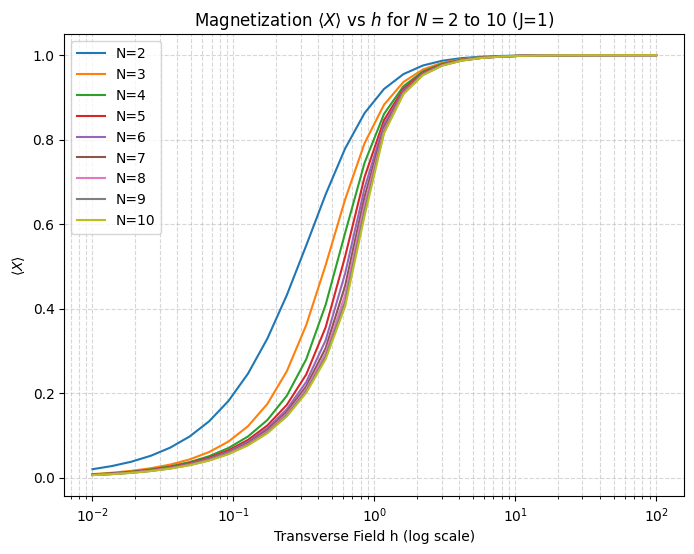

In [53]:
h_list = np.logspace(-2, 2, 30)
N_list = range(2, 11)
mx_vs_h = np.zeros((len(N_list), len(h_list)))
for iN, N in enumerate(N_list):
    for ih, h in enumerate(h_list):
        H = build_hamiltonian(N, J=1.0, h=h)
        eigvals, eigvecs = eigh(H)
        ground_state = eigvecs[:, 0]
        mx = magnetization_x(ground_state, N, X, kron_N, I)
        mx_vs_h[iN, ih] = mx

plt.figure(figsize=(8,6))
for iN, N in enumerate(N_list):
    plt.plot(h_list, mx_vs_h[iN], label=f"N={N}")
plt.xscale('log')
plt.xlabel('Transverse Field h (log scale)')
plt.ylabel(r'$\langle X \rangle$')
plt.title(r'Magnetization $\langle X \rangle$ vs $h$ for $N=2$ to $10$ (J=1)')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

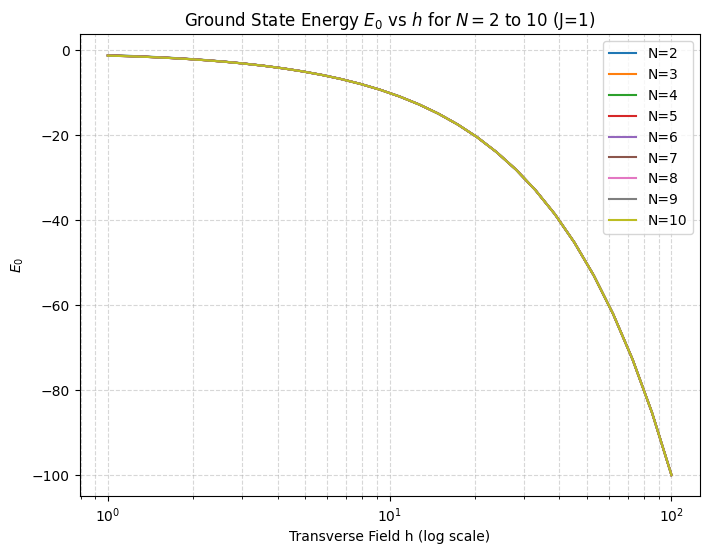

In [ ]:
# 计算并绘制不同N下基态能量 E0 vs h
h_list = np.logspace(-2, 2, 30)
N_list = range(2, 11)
E0_vs_h = np.zeros((len(N_list), len(h_list)))
for iN, N in enumerate(N_list):
    for ih, h in enumerate(h_list):
        H = build_hamiltonian(N, J=1.0, h=h)
        eigvals, eigvecs = eigh(H)
        E0 = eigvals[0]
        E0_vs_h[iN, ih] = E0 / N  # 每个site的能量

plt.figure(figsize=(8,6))
for iN, N in enumerate(N_list):
    plt.plot(h_list, E0_vs_h[iN], label=f"N={N}")
plt.xscale('log')
plt.xlabel('Transverse Field h (log scale)')
plt.ylabel(r'$E_0$')
plt.title(r'Ground State Energy $E_0$ vs $h$ for $N=2$ to $10$ (J=1)')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

In [58]:
# 计算 h=1 时 N=2~10 的 E0, <Z>, <X>
N_list = range(2, 11)
E0_list, mz_list, mx_list = [], [], []
for N in N_list:
    H = build_hamiltonian(N, J=1.0, h=1.0)
    eigvals, eigvecs = eigh(H)
    ground_state = eigvecs[:, 0]
    Z_total = build_total_op(N, Z)
    X_total = build_total_op(N, X)
    E0 = eigvals[0]
    mz = np.vdot(ground_state, Z_total @ ground_state).real / N
    mx = np.vdot(ground_state, X_total @ ground_state).real / N
    E0_list.append(E0)
    mz_list.append(mz)
    mx_list.append(mx)

print("Summary for h=1, N=2 to 10:")
for i, N in enumerate(N_list):
    print(f"N={N}: E0={E0_list[i]:.6f}, <Z>={mz_list[i]:.6f}, <X>={mx_list[i]:.6f}")

Summary for h=1, N=2 to 10:
N=2: E0=-2.236068, <Z>=0.000000, <X>=0.894427
N=3: E0=-3.493959, <Z>=-0.000000, <X>=0.842363
N=4: E0=-4.758770, <Z>=-0.000000, <X>=0.810095
N=5: E0=-6.026674, <Z>=0.000000, <X>=0.787732
N=6: E0=-7.296230, <Z>=-0.000000, <X>=0.771145
N=7: E0=-8.566772, <Z>=-0.000000, <X>=0.758264
N=8: E0=-9.837951, <Z>=0.000000, <X>=0.747924
N=9: E0=-11.109566, <Z>=0.000000, <X>=0.739408
N=10: E0=-12.381490, <Z>=-0.000000, <X>=0.732255
